## Observations and Insights

## Dependencies and starter code

In [71]:
%matplotlib notebook

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import csv

In [82]:
# Data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

In [83]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [84]:
# Get file information councerning data counts,columns, types, etc
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
Mouse ID        249 non-null object
Drug Regimen    249 non-null object
Sex             249 non-null object
Age_months      249 non-null int64
Weight (g)      249 non-null int64
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [85]:
# Get file information councerning data counts,columns, types, etc
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [86]:
# Combine the data into a single dataset
files_combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
files_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [87]:
# Display the data table for preview of first 10 records
files_combined_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [88]:
# Display the data table for preview of last 10 records
#files_combined_df.tail(10)

In [89]:
files_combined_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Summary statistics

In [90]:
# Mean Logic - Tumor Volume
# Place combined file fields from index 1(Drug Regimen), 6 (Tumor Volume) in a mean dataframe 
mean_df = files_combined_df.iloc[:,[1,6]]
#mean_df

In [91]:
# Mean Logic - Tumor Volume
# Group by Drug
mean_grouped= mean_df.groupby(["Drug Regimen"]).mean()
mean_grouped

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [92]:
# Mean Logic - Tumor Volume
# Convert to DataFrame adding Mean to column name for 
mean_tumor_volume_df= mean_grouped.add_suffix('_Mean').reset_index()

# Preview DataFrame
mean_tumor_volume_df

,Drug Regimen,Tumor Volume (mm3)_Mean
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.322552
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [93]:
# Median Logic - Tumor Volume
# Place combined file fields from index 1(Drug Regimen), 6 (Tumor Volume) in a median dataframe 
median_df = files_combined_df.iloc[:,[1,6]]
median_df

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [94]:
# Median Logic - Tumor Volume
# Group by Drug
median_grouped= median_df.groupby(["Drug Regimen"]).median()
median_grouped

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.854632
Ramicane,40.673236
Stelasyn,52.431737


In [95]:
# Median Logic - Tumor Volume
# Convert to DataFrame adding Mean to column name for 
median_tumor_volume_df= median_grouped.add_suffix('_Median').reset_index()

# Preview DataFrame
median_tumor_volume_df

,Drug Regimen,Tumor Volume (mm3)_Median
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285
5,Placebo,52.288934
6,Propriva,50.854632
7,Ramicane,40.673236
8,Stelasyn,52.431737
9,Zoniferol,51.818479


In [96]:
# Variance Logic - Tumor Volume
# Place combined file fields from index 1(Drug Regimen), 6 (Tumor Volume) in a variance dataframe 
variance_df = files_combined_df.iloc[:,[1,6]]
variance_df

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [97]:
# Variance Logic - Tumor Volume
# Group by Drug and Timepoint
variance_grouped= variance_df.groupby(["Drug Regimen"]).var()
variance_grouped

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.351070
Ramicane,23.486704
Stelasyn,59.450562


In [98]:
# Variance Logic - Tumor Volume
# Convert to DataFrame adding Mean to column name for 
variance_tumor_volume_df= variance_grouped.add_suffix('_Variance').reset_index()

# Preview DataFrame
variance_tumor_volume_df

,Drug Regimen,Tumor Volume (mm3)_Variance
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479
5,Placebo,61.168083
6,Propriva,42.351070
7,Ramicane,23.486704
8,Stelasyn,59.450562
9,Zoniferol,48.533355


In [99]:
# Standard Deviation Logic - Tumor Volume
# Place combined file fields from index 1(Drug Regimen), 6 (Tumor Volume) in a std dev dataframe 
std_dev_df = files_combined_df.iloc[:,[1,6]]
std_dev_df

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [100]:
# Standard Deviation Logic - Tumor Volume
# Group by Drug and Timepoint
std_dev_grouped= std_dev_df.groupby(["Drug Regimen"]).std()
std_dev_grouped

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.507770
Ramicane,4.846308
Stelasyn,7.710419


In [101]:
# Standard Deviation Logic - Tumor Volume
# Convert to DataFrame adding Mean to column name for 
std_dev_tumor_volume_df= std_dev_grouped.add_suffix('_Std_Dev').reset_index()

# Preview DataFrame
std_dev_tumor_volume_df

,Drug Regimen,Tumor Volume (mm3)_Std_Dev
0,Capomulin,4.994774
1,Ceftamin,6.268188
2,Infubinol,6.567243
3,Ketapril,8.279709
4,Naftisol,8.134708
5,Placebo,7.821003
6,Propriva,6.507770
7,Ramicane,4.846308
8,Stelasyn,7.710419
9,Zoniferol,6.966589


In [102]:
# SEM Logic - Tumor Volume
# Place combined file fields from index 1(Drug Regimen), 6 (Tumor Volume) in a sem dataframe 
sem_df = files_combined_df.iloc[:,[1,6]]
sem_df

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [103]:
# SEM Logic - Tumor Volume
# Group by Drug and Timepoint
sem_grouped= sem_df.groupby(["Drug Regimen"]).sem()
sem_grouped

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111


In [104]:
# SEM Logic - Tumor Volume
# Convert to DataFrame adding Mean to column name for 
sem_tumor_volume_df= sem_grouped.add_suffix('_SEM').reset_index()

# Preview DataFrame
sem_tumor_volume_df

,Drug Regimen,Tumor Volume (mm3)_SEM
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466
5,Placebo,0.581331
6,Propriva,0.512884
7,Ramicane,0.320955
8,Stelasyn,0.573111
9,Zoniferol,0.516398


## Bar plots

In [105]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Place combined file fields from index 1(Drug Regimen), 2(Sex), 5 (Timepoint), 6 (Tumor Volume) in a median dataframe 
data_points_df = files_combined_df.iloc[:,[0,1]]
data_points_df

# Find out how many of data points per drug regimen
data_points = data_points_df.groupby('Drug Regimen').count()

In [106]:
# Data Points List
data_points

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


<IPython.core.display.Javascript object>


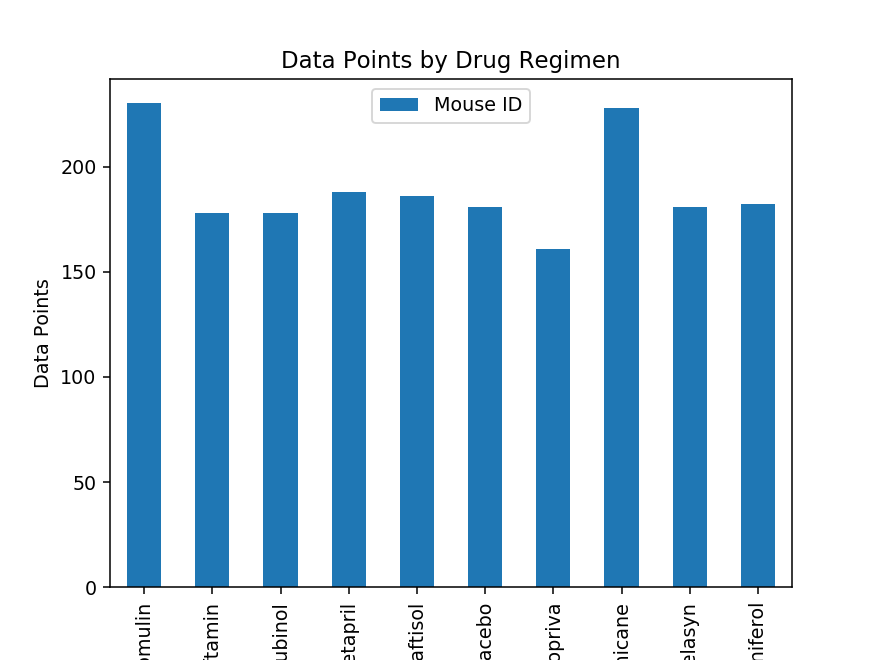

Text(0, 0.5, 'Data Points')

In [110]:
# Chart our data, give it a title, and label the axes using pandas
drug_chart = data_points.plot(kind="bar", title="Data Points by Drug Regimen")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Data Points")


<IPython.core.display.Javascript object>


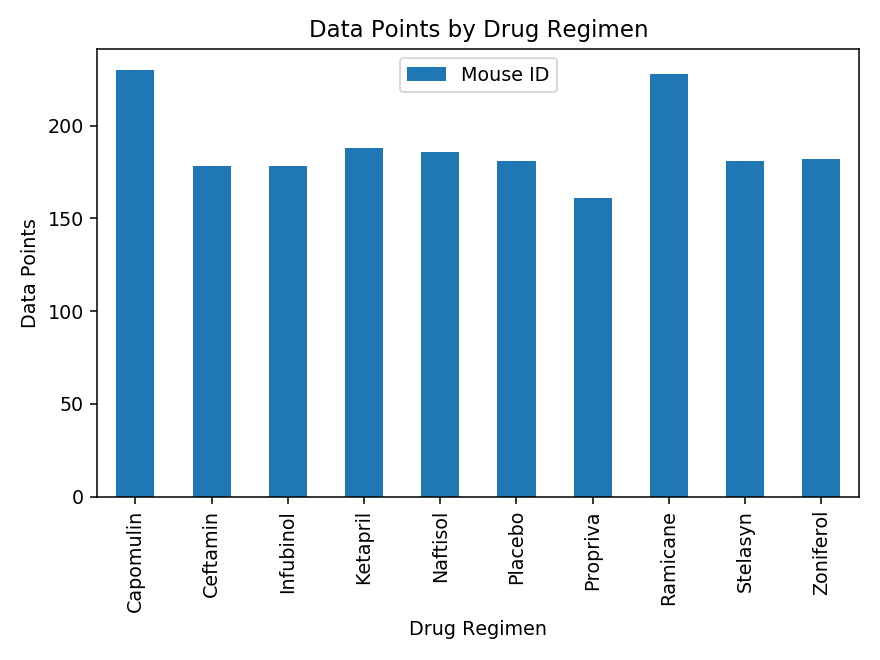

In [111]:
# Generate a bar plot showing number of data points for each treatment regimen using matplotlib
# Chart our data, give it a title, and label the axes
drug_chart = data_points.plot(kind="bar", title="Data Points by Drug Regimen", legend='best')
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Data Points")
plt.legend(data_points,loc=9)
plt.show()
plt.tight_layout()

## Pie plots

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create a dataframe reflecting count by Sex based on Mouse ID
sex_data_points_df = mouse_metadata.iloc[:,[0,2]]
#sex_data_points_df 

# Find out how many of data points per drug regimen using groupby
sex_data_points_df1 = sex_data_points_df.groupby('Sex').count()
sex_data_points_df1

,Mouse ID
Sex,
Female,124
Male,125


<IPython.core.display.Javascript object>


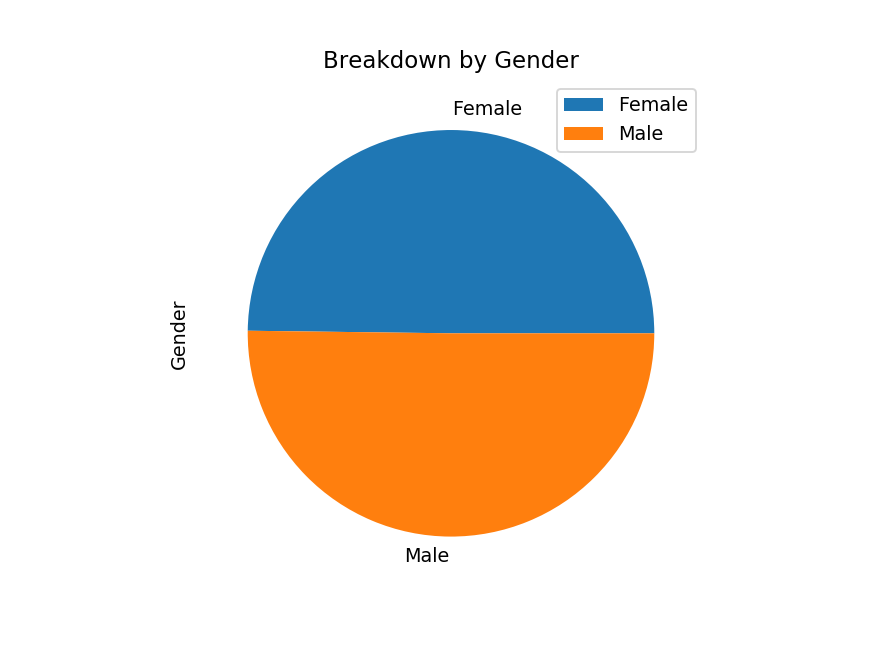

Text(0, 0.5, 'Gender')

In [114]:
# Plot the pie chart Pandas
gender_list = sex_data_points_df1.keys()
gender_type = sex_data_points_df1.plot(kind="pie", y=gender_list, title=("Breakdown by Gender"))
gender_type.set_ylabel("Gender")

<IPython.core.display.Javascript object>


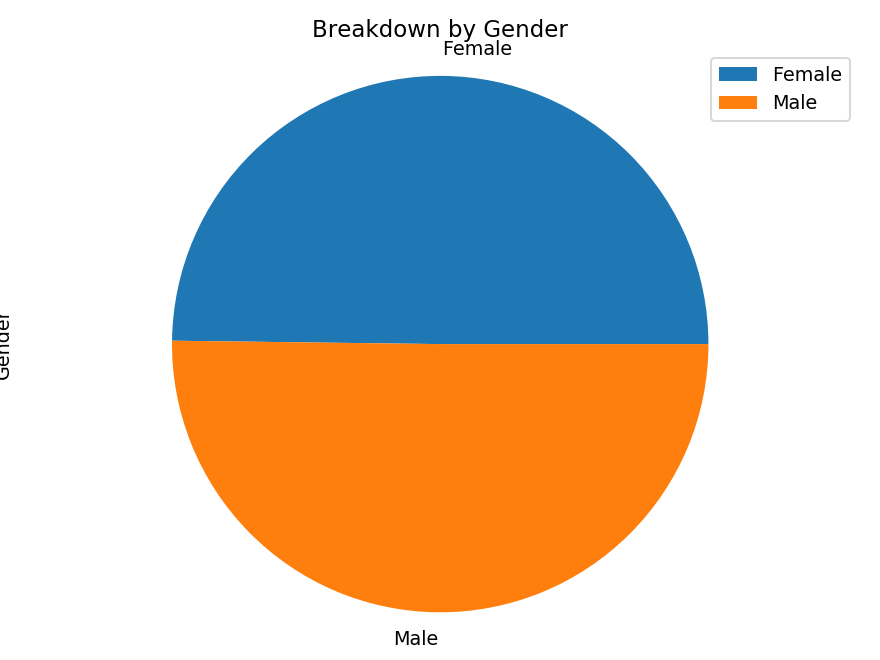

(-1.1016630746735625,
 1.1000791940320744,
 -1.1009347297692742,
 1.1017685314144794)

In [115]:
# Plot the pie chart Matplotlibs
gender_list = sex_data_points_df1.keys()
gender_type = sex_data_points_df1.plot(kind="pie", y=gender_list, title=("Breakdown by Gender"))
gender_type.set_ylabel("Gender")
plt.show()
plt.tight_layout()
plt.axis("equal")

## Quartiles, outliers and boxplots

In [116]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# 'Capomulin', 'Ramicane', 'Infubinol', and 'Ceftamin'  ---- Tumpor Volume (mm3)
timepoint_max_df1 = files_combined_df.iloc[:,[1,0,5]]
timepoint_max_df1

#timepoint_max_df = timepoint_max_df1.groupby(['Mouse ID','Drug Regimen']).max()['Timepoint']
#timepoint_max_df

,Drug Regimen,Mouse ID,Timepoint
0,Ramicane,k403,0
1,Ramicane,k403,5
2,Ramicane,k403,10
3,Ramicane,k403,15
4,Ramicane,k403,20
...,...,...,...
1888,Naftisol,z969,25
1889,Naftisol,z969,30
1890,Naftisol,z969,35
1891,Naftisol,z969,40


In [117]:
tumor_volume_max_merged = pd.merge(timepoint_max_df1,files_combined_df,  on=['Mouse ID', 'Drug Regimen', 'Timepoint'], how="left")
tumor_volume_max_merged

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Ramicane,k403,0,Male,21,16,45.000000,0
1,Ramicane,k403,5,Male,21,16,38.825898,0
2,Ramicane,k403,10,Male,21,16,35.014271,1
3,Ramicane,k403,15,Male,21,16,34.223992,1
4,Ramicane,k403,20,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1898,Naftisol,z969,25,Male,9,30,63.145652,2
1899,Naftisol,z969,30,Male,9,30,65.841013,3
1900,Naftisol,z969,35,Male,9,30,69.176246,4
1901,Naftisol,z969,40,Male,9,30,70.314904,4


In [118]:
# Groupby max timepoint and mouse id
max_tumor = tumor_volume_max_merged.groupby('Mouse ID').max()
max_tumor = max_tumor.reset_index()
tumor_volume_max_pivot2_df = max_tumor[['Mouse ID','Timepoint']].merge(files_combined_df,on=['Mouse ID','Timepoint'],how="left")
tumor_volume_max_pivot2_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [119]:
# Drop all rows with missing information for Capomulin DF to have Tumor Volume max for each mouse
tumor_volume_max_capomulin_df= tumor_volume_max_pivot2_df.loc[tumor_volume_max_pivot2_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
#tumor_volume_max_capomulin_df

tumor_volume_max_capomulin_cleansed_df = tumor_volume_max_capomulin_df.dropna(how='any')
tumor_volume_max_capomulin_cleansed_df

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [120]:
# Drop all rows with missing information for Ramicane DF to have Tumor Volume max for each mouse
tumor_volume_max_ramicane_df= tumor_volume_max_pivot2_df.loc[tumor_volume_max_pivot2_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
#tumor_volume_max_ramicane_df
tumor_volume_max_ramicane_cleansed_df = tumor_volume_max_ramicane_df.dropna(how='any')
tumor_volume_max_ramicane_cleansed_df

6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
77     33.562402
78     36.374510
92     31.560470
94     36.134852
97     22.050126
120    30.564625
127    31.095335
158    45.220869
159    36.561652
167    37.225650
169    43.419381
178    30.276232
191    40.667713
218    43.166373
236    44.183451
245    30.638696
Name: Tumor Volume (mm3), dtype: float64

In [121]:
# Drop all rows with missing information for infubinol DF to have Tumor Volume max for each mouse
tumor_volume_max_infubinol_df= tumor_volume_max_pivot2_df.loc[tumor_volume_max_pivot2_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
#tumor_volume_max_infubinol_df
tumor_volume_max_infubinol_cleansed_df = tumor_volume_max_infubinol_df.dropna(how='any')
tumor_volume_max_infubinol_cleansed_df

0      67.973419
1      65.525743
11     57.031862
13     66.083066
27     72.226731
31     36.321346
41     60.969711
50     62.435404
56     60.918767
79     67.289621
98     66.196912
102    62.117279
124    47.010364
130    60.165180
142    55.629428
143    45.699331
154    54.656549
171    55.650681
198    46.250112
201    54.048608
203    51.542431
212    50.005138
217    58.268442
234    67.685569
246    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [122]:
# Drop all rows with missing information for infubinol DF to have Tumor Volume max for each mouse
tumor_volume_max_ceftamin_df= tumor_volume_max_pivot2_df.loc[tumor_volume_max_pivot2_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
#tumor_volume_max_ceftamin_df
tumor_volume_max_ceftamin_cleansed_df = tumor_volume_max_ceftamin_df.dropna(how='any')
tumor_volume_max_ceftamin_cleansed_df

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
76     47.784682
89     61.849023
95     68.923185
107    67.748662
108    57.918381
110    46.784535
111    59.851956
114    64.299830
135    59.741901
151    61.433892
155    64.192341
185    45.000000
189    52.925348
190    45.000000
210    67.527482
224    45.000000
229    64.634949
232    61.386660
239    68.594745
241    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [123]:
# If the data is in a dataframe, we use pandas to give quartile calculations

#Capomulin
print('----------------------------------------------------------------------------------')
print('')
print('Capomulin')
print('')
cap_quartiles = tumor_volume_max_capomulin_cleansed_df.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

print(f"The lower quartile of tumor volue is: {cap_lowerq}")
print(f"The upper quartile of tumor volue is: {cap_upperq}")
print(f"The the median of tumor volue is: {cap_quartiles[0.5]} ")
print(f"The interquartile range of tumor volue is: {cap_iqr}")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")
print('')
print('----------------------------------------------------------------------------------')
print('')

----------------------------------------------------------------------------------

Capomulin

The lower quartile of tumor volue is: 32.37735684
The upper quartile of tumor volue is: 40.1592203
The the median of tumor volue is: 38.125164399999996 
The interquartile range of tumor volue is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

----------------------------------------------------------------------------------



In [124]:
#"Ramicane"
print('----------------------------------------------------------------------------------')
print('')
print('Ramicane')
print('')
ram_quartiles = tumor_volume_max_ramicane_cleansed_df.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

print(f"The lower quartile of tumor volue is: {ram_lowerq}")
print(f"The upper quartile of tumor volue is: {ram_upperq}")
print(f"The the median of tumor volue is: {ram_quartiles[0.5]} ")
print(f"The interquartile range of tumor volue is: {ram_iqr}")

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")
print('')
print('----------------------------------------------------------------------------------')
print('')

----------------------------------------------------------------------------------

Ramicane

The lower quartile of tumor volue is: 31.56046955
The upper quartile of tumor volue is: 40.65900627
The the median of tumor volue is: 36.56165229 
The interquartile range of tumor volue is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

----------------------------------------------------------------------------------



In [125]:
#Infubinol
print('----------------------------------------------------------------------------------')
print('')
print('Infubinol')
print('')
inf_quartiles = tumor_volume_max_infubinol_cleansed_df.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

print(f"The lower quartile of tumor volue is: {inf_lowerq}")
print(f"The upper quartile of tumor volue is: {inf_upperq}")
print(f"The the median of tumor volue is: {inf_quartiles[0.5]} ")
print(f"The interquartile range of tumor volue is: {inf_iqr}")

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")
print('')
print('----------------------------------------------------------------------------------')
print('')

----------------------------------------------------------------------------------

Infubinol

The lower quartile of tumor volue is: 54.04860769
The upper quartile of tumor volue is: 65.52574285
The the median of tumor volue is: 60.16518046 
The interquartile range of tumor volue is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

----------------------------------------------------------------------------------



In [126]:
#Ceftamin
print('----------------------------------------------------------------------------------')
print('')
print('Ceftamin')
print('')
cef_quartiles = tumor_volume_max_ceftamin_cleansed_df.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

print(f"The lower quartile of tumor volue is: {cef_lowerq}")
print(f"The upper quartile of tumor volue is: {cef_upperq}")
print(f"The the median of tumor volue is: {cef_quartiles[0.5]} ")
print(f"The interquartile range of tumor volue is: {cef_iqr}")

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")
print('')
print('----------------------------------------------------------------------------------')
print('')

----------------------------------------------------------------------------------

Ceftamin

The lower quartile of tumor volue is: 48.72207785
The upper quartile of tumor volue is: 64.29983003
The the median of tumor volue is: 59.85195552 
The interquartile range of tumor volue is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.

----------------------------------------------------------------------------------



<IPython.core.display.Javascript object>


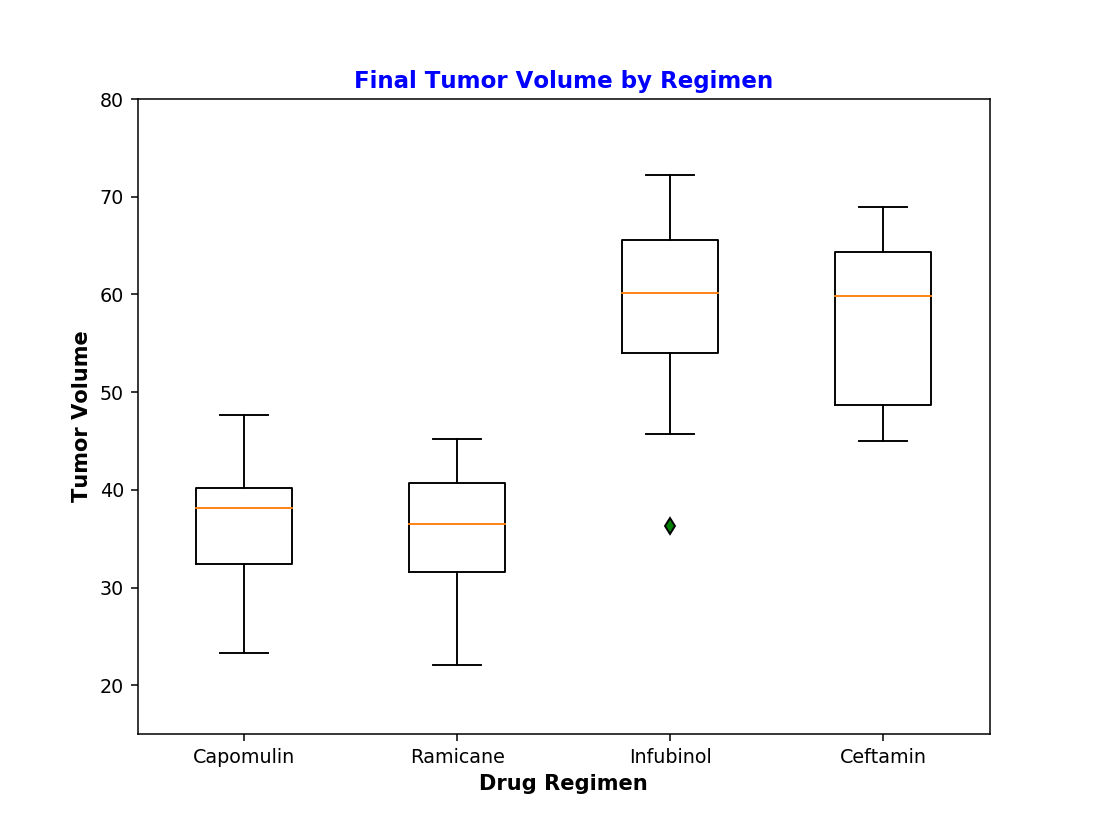

In [128]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#"Capomulin", "Ramicane", "Infubinol", "Ceftamin"

fig, ax= plt.subplots(figsize=(8,6))
#green_diamond = dict(markerfacecolor='green')

plt.boxplot([tumor_volume_max_capomulin_cleansed_df,
tumor_volume_max_ramicane_cleansed_df,
tumor_volume_max_infubinol_cleansed_df,
tumor_volume_max_ceftamin_cleansed_df],
labels=['Capomulin','Ramicane', 'Infubinol','Ceftamin'],
flierprops = dict(marker='d', markerfacecolor='green', markersize=6))

plt.title("Final Tumor Volume by Regimen", fontsize=12, fontweight='bold', color='b')
plt.xlabel('Drug Regimen', fontsize=11, fontweight='bold')
plt.ylabel('Tumor Volume', fontsize=11, fontweight='bold')
plt.ylim(15,80)
#plt.grid()
plt.show()

## Line and scatter plots

In [129]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Make a variable called mouse_id and store a 'Mouse ID' in it
capomulin_mouse_id = 'm601'
capomulin_mouse_id

'm601'

In [130]:
# Collect the trips of the 'Mouse ID' above
mouse_tt_data_df = files_combined_df.loc[(files_combined_df["Mouse ID"] == capomulin_mouse_id), :]
mouse_tt_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


In [131]:
mouse_tt_data_df1 = mouse_tt_data_df.iloc[:,[0,5,6]]
mouse_tt_data_df1

,Mouse ID,Timepoint,Tumor Volume (mm3)
30,m601,0,45.000000
31,m601,5,41.408591
32,m601,10,36.825367
33,m601,15,35.464612
34,m601,20,34.255732
35,m601,25,33.118756
36,m601,30,31.758275
37,m601,35,30.834357
38,m601,40,31.378045
39,m601,45,28.430964


<IPython.core.display.Javascript object>


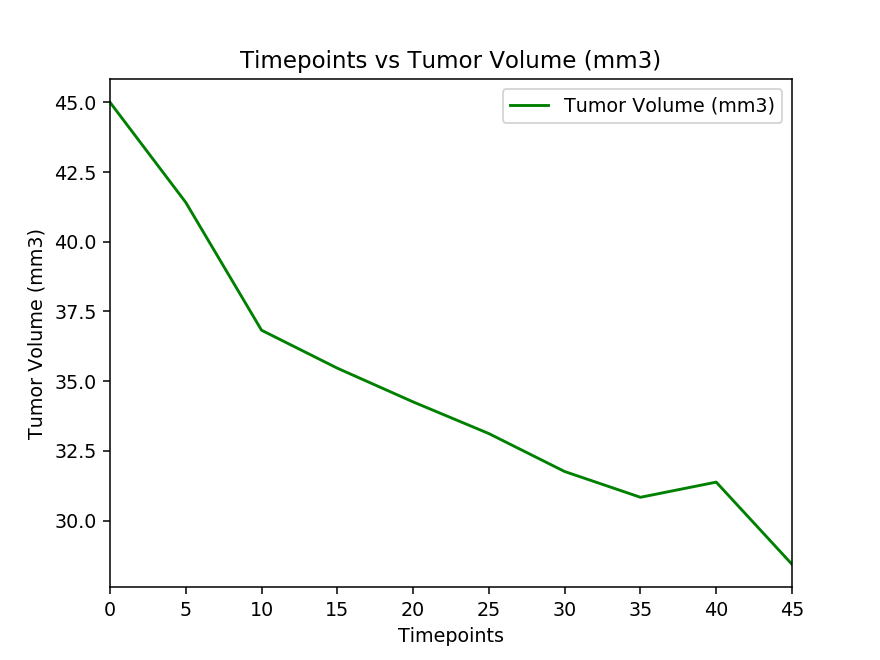

In [132]:
# Create Line Plot reflecting Timepoint vs Tumor Volume for a single Mouse
mouse_tt_data_df1.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',color='g')
# Create labels for the X and Y axis and Title
plt.title("Timepoints vs Tumor Volume (mm3)")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [133]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Export file as a CSV, without the Pandas index, but with the header 
#Created to validate the results below when I get the mean
files_combined_df.to_csv("data/files_combined_df.csv", index=False, header=True)

In [134]:
# Mean Logic - Tumor Volume
# Create file to contain only the necessary columns
mean_scatter_df = files_combined_df.iloc[:,[0,1,4,6]]
mean_scatter_df

,Mouse ID,Drug Regimen,Weight (g),Tumor Volume (mm3)
0,k403,Ramicane,16,45.000000
1,k403,Ramicane,16,38.825898
2,k403,Ramicane,16,35.014271
3,k403,Ramicane,16,34.223992
4,k403,Ramicane,16,32.997729
...,...,...,...,...
1888,z969,Naftisol,30,63.145652
1889,z969,Naftisol,30,65.841013
1890,z969,Naftisol,30,69.176246
1891,z969,Naftisol,30,70.314904


In [135]:
# Mean Logic - Tumor Volume
# Group by Drug and Timepoint to find Mean / Average
mean_scatter_grouped_df= mean_scatter_df.groupby(["Drug Regimen", "Mouse ID"]).mean()
mean_scatter_grouped_df

Weight (g)  Tumor Volume (mm3)
Drug Regimen Mouse ID                                
Capomulin    b128              22           41.963636
             b742              21           40.083699
             f966              17           36.505973
             g288              19           41.990097
             g316              22           44.613344
...                           ...                 ...
Zoniferol    q633              25           56.124896
             s337              27           51.515155
             w140              30           46.358976
             w575              28           56.627561
             x613              29           46.498216

[249 rows x 2 columns]

In [136]:
# Mean Logic - Tumor Volume
# Convert to DataFrame adding Mean to column name for 
mean_scatter_grouped_df1= mean_scatter_grouped_df.add_suffix('_Mean').reset_index()
mean_scatter_grouped_df1

,Drug Regimen,Mouse ID,Weight (g)_Mean,Tumor Volume (mm3)_Mean
0,Capomulin,b128,22,41.963636
1,Capomulin,b742,21,40.083699
2,Capomulin,f966,17,36.505973
3,Capomulin,g288,19,41.990097
4,Capomulin,g316,22,44.613344
...,...,...,...,...
244,Zoniferol,q633,25,56.124896
245,Zoniferol,s337,27,51.515155
246,Zoniferol,w140,30,46.358976
247,Zoniferol,w575,28,56.627561


In [137]:
# Create DF with only Capomulin average weight and tumor volumes
mean_scatter_grouped_df2= mean_scatter_grouped_df1.loc[(mean_scatter_grouped_df1["Drug Regimen"] == 'Capomulin'), :]
mean_scatter_grouped_df2

,Drug Regimen,Mouse ID,Weight (g)_Mean,Tumor Volume (mm3)_Mean
0,Capomulin,b128,22,41.963636
1,Capomulin,b742,21,40.083699
2,Capomulin,f966,17,36.505973
3,Capomulin,g288,19,41.990097
4,Capomulin,g316,22,44.613344
5,Capomulin,i557,24,44.805810
6,Capomulin,i738,20,39.141053
7,Capomulin,j119,23,44.465236
8,Capomulin,j246,21,43.216925
9,Capomulin,l509,21,44.434474


In [138]:
# Pivot tumor volume max result set from above
#Drug Regimen	Timepoint	Weight (g)_Mean	Tumor Volume (mm3)_Mean
mean_scatter_grouped_df3= mean_scatter_grouped_df2.pivot(index= 'Mouse ID', columns= 'Drug Regimen')
mean_scatter_grouped_df3

,Weight (g)_Mean,Tumor Volume (mm3)_Mean
Drug Regimen,Capomulin,Capomulin
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236


<IPython.core.display.Javascript object>


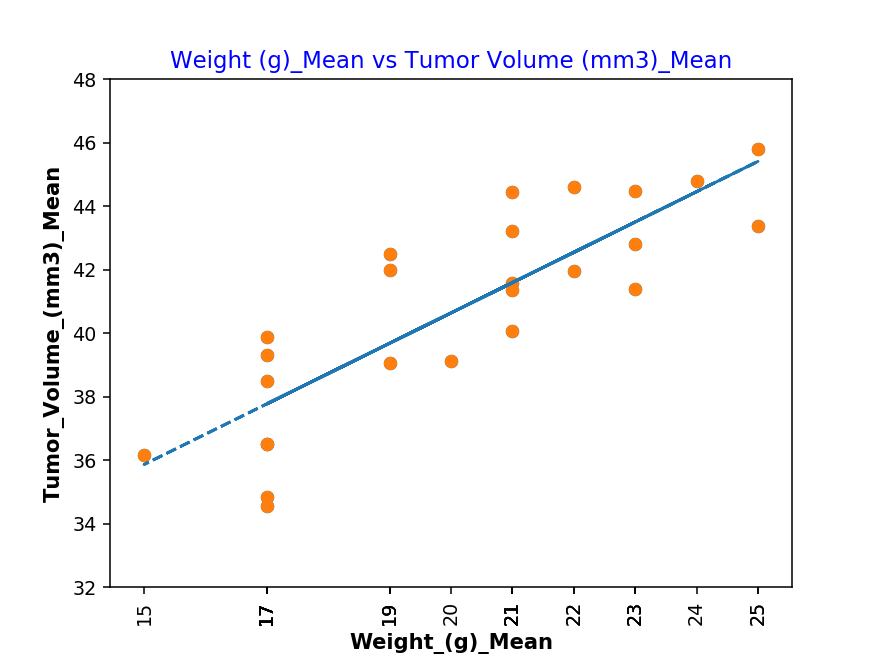

In [139]:
# a scatter plot comparing num_children and num_pets
mean_scatter_grouped_df3.plot(kind='scatter',x='Weight (g)_Mean',y='Tumor Volume (mm3)_Mean',color='b',marker='x')
#plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Weight (g)_Mean vs Tumor Volume (mm3)_Mean", fontsize=12, fontweight='bold', color='b')
plt.xlabel('Weight (g)_Mean', fontsize=11, fontweight='bold')
plt.ylabel('Tumor Volume (mm3)_Mean', fontsize=11, fontweight='bold')
plt.ylim(32,48)
plt.title("Weight (g)_Mean vs Tumor Volume (mm3)_Mean")
plt.xlabel("Weight (g)_Mean")
plt.ylabel("Tumor Volume (mm3)_Mean")
plt.show()

In [140]:
# Calculate the correlation coefficient and linear regression model for 
# mouse weight and average tumor volume for the Capomulin regimen
mean_scatter_grouped_df3.corr()

,,Weight (g)_Mean,Tumor Volume (mm3)_Mean
,Drug Regimen,Capomulin,Capomulin
,Drug Regimen,,
Weight (g)_Mean,Capomulin,1.000000,0.841936
Tumor Volume (mm3)_Mean,Capomulin,0.841936,1.000000


In [141]:
weight = mean_scatter_grouped_df2.iloc[:,2]
tumorvolume = mean_scatter_grouped_df2.iloc[:,3]
correlation = st.pearsonr(weight,tumorvolume)
plt.scatter(weight,tumorvolume)
plt.xlabel('weight_(g)_Mean')
plt.ylabel('tumor_volume_(mm3)_Mean')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.84


In [142]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume 
#for the Capomulin treatment. 
#Plot the linear regression model on top of the previous scatter plot.

# Perform a linear regression on year versus violent crime rate
tv_slope, tv_int, tv_r, tv_p, tv_std_err = st.linregress(weight,tumorvolume)

In [143]:
# Create equation of line to calculate predicted violent crime rate
tv_fit = tv_slope * weight + tv_int

In [144]:
# Plot the linear model on top of scatter plot 
weight = mean_scatter_grouped_df2.iloc[:,2]
tumorVolume = mean_scatter_grouped_df2.iloc[:,3]
plt.scatter(weight,tumorvolume)
plt.plot(weight,tv_fit,"--")
plt.xticks(weight, rotation=90)
plt.xlabel('Weight_(g)_Mean')
plt.ylabel('Tumor_Volume_(mm3)_Mean')
plt.show()

## THE END